# Initial code for Data Exploration.
# The data cleaning was made using Excel before Loading to the MySQL database

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.colors as mcolors
import warnings
from scipy import stats
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = 500

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
 }

<IPython.core.display.Javascript object>

### Data Exploration

In [3]:
df = pd.read_csv(r"Sample - Superstore.csv")

In [4]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

### Check for Nulls

<AxesSubplot:>

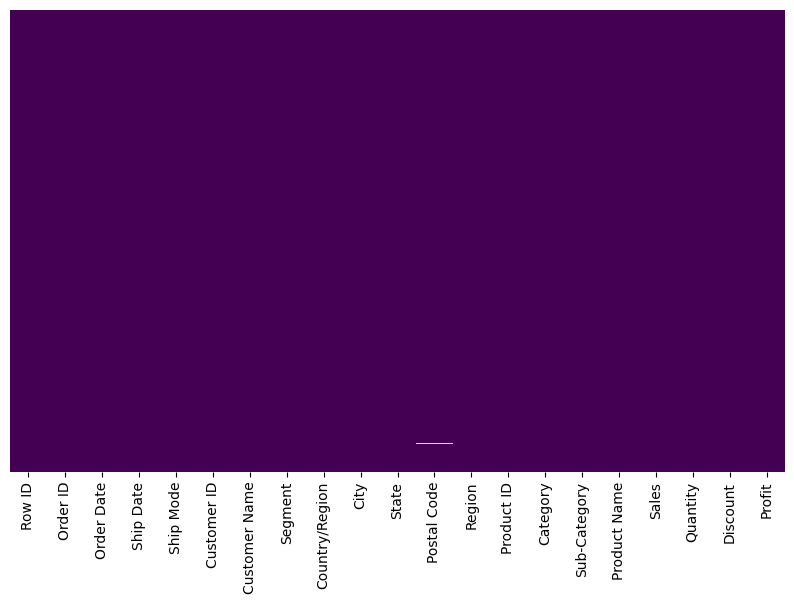

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

- We have **one NaN in the Postal Codes**.

### Check for consistency in Unique values
- Customer IDs and Customer Names
- Product IDs and Product Names

In [8]:
for col in df.columns:
    print ("Column: {} \t\t| Unique values: {} ".format(col, df[col].nunique()))

Column: Row ID 		| Unique values: 9994 
Column: Order ID 		| Unique values: 5009 
Column: Order Date 		| Unique values: 1236 
Column: Ship Date 		| Unique values: 1334 
Column: Ship Mode 		| Unique values: 4 
Column: Customer ID 		| Unique values: 793 
Column: Customer Name 		| Unique values: 793 
Column: Segment 		| Unique values: 3 
Column: Country/Region 		| Unique values: 1 
Column: City 		| Unique values: 531 
Column: State 		| Unique values: 49 
Column: Postal Code 		| Unique values: 630 
Column: Region 		| Unique values: 4 
Column: Product ID 		| Unique values: 1862 
Column: Category 		| Unique values: 3 
Column: Sub-Category 		| Unique values: 17 
Column: Product Name 		| Unique values: 1849 
Column: Sales 		| Unique values: 5825 
Column: Quantity 		| Unique values: 14 
Column: Discount 		| Unique values: 12 
Column: Profit 		| Unique values: 7287 


- We have an inconsistency in the unique values **Products ID = 1862** and **Product Name = 1849**.  We have less "Product Name"s than "Product ID"s. **Should be equal!!**.  It means there are Product IDs with the same Product Name associated

### Checking Names similarity

In [9]:
print(df['Customer Name'].filter(regex='^Claire Gute'))


Series([], Name: Customer Name, dtype: object)


### Checking Zip Codes (5 digits)

In [10]:
print("UNIQUE VALUES:\n")
for col in df:
    print(col)
    print( len(df[col].unique()))
    print( df[col].unique())

UNIQUE VALUES:

Row ID
9994
[   1    2    3 ... 9992 9993 9994]
Order ID
5009
['CA-2020-152156' 'CA-2020-138688' 'US-2019-108966' ... 'CA-2018-110422'
 'CA-2021-121258' 'CA-2021-119914']
Order Date
1236
['2020-11-08' '2020-06-12' '2019-10-11' ... '2020-06-03' '2019-04-12'
 '2018-01-21']
Ship Date
1334
['2020-11-11' '2020-06-16' '2019-10-18' ... '2019-05-23' '2018-01-23'
 '2021-03-03']
Ship Mode
4
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer ID
793
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 

In [11]:
cols_to_check_duplicates =['Order ID', 'Order Date', 'Customer ID', 'Product ID']
bool_series = df.duplicated(subset=cols_to_check_duplicates)
bool_series

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [12]:
df[~bool_series]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
features_to_sum=['Sales','Quantity','Profit']
features_to_group_by = ['Region', 'State', 'Category']

In [14]:
double_group = df.groupby(features_to_group_by) 
double_group[features_to_sum].sum().head(500)
# double_group['Sales_to_Profit'] = double_group['Sales']/double_group['Profit'] 
# .sum().sort_values('Confirmed', ascending=False).head(10)

Sales  Quantity  \
Region  State                Category                                 
Central Illinois             Furniture         28274.5220       448   
                             Office Supplies   19907.9060      1095   
                             Technology        31983.6730       302   
        Indiana              Furniture         11496.7100        83   
                             Office Supplies   15735.4000       389   
                             Technology        26323.2500       106   
        Iowa                 Furniture          2642.3100        24   
                             Office Supplies     783.1500        75   
                             Technology         1154.3000        13   
        Kansas               Furniture           111.1200         8   
                             Office Supplies    1954.1500        47   
                             Technology          849.0400        19   
        Michigan             Furniture         22321.1000       184   
                             Office Supplies   37723.7590       612   
                             Technology        16224.7550       150   
        Minnesota            Furniture          7611.3500        52   
                             Office Supplies   19406.5400       241   
                             Technology         2845.2600        38   
        Missouri             Furniture          2936.4500        35   
                             Office Supplies   12182.1800       163   
                             Technology         7086.5200        54   
        Nebraska             Furniture          1944.7000        21   
                             Office Supplies    2234.4900        89   
                             Technology         3285.7400        26   
        North Dakota         Office Supplies     919.9100        30   
        Oklahoma             Furniture          8284.1000        57   
                             Office Supplies    5030.8400       123   
                             Technology         6368.4500        67   
        South Dakota         Furniture           324.9000         5   
                             Office Supplies     597.7200        31   
                             Technology          392.9400         6   
        Texas                Furniture         60593.2918       766   
                             Office Supplies   44490.5300      2299   
                             Technology        65104.2240       659   
        Wisconsin            Furniture         17256.6100       144   
                             Office Supplies    6059.8400       215   
                             Technology         8798.1600       104   
East    Connecticut          Furniture          5174.9870        46   
                             Office Supplies    5418.3400       206   
                             Technology         2791.0300        29   
        Delaware             Furniture          4759.3190        64   
                             Office Supplies    8129.5300       244   
                             Technology        14562.2200        59   
        District of Columbia Furniture          1346.5800         8   
                             Office Supplies     138.5200        24   
                             Technology         1379.9200         8   
        Maine                Furniture           109.4800         2   
                             Office Supplies     399.8000        19   
                             Technology          761.2500        14   
        Maryland             Furniture          9149.2530       104   
                             Office Supplies   10390.2300       272   
                             Technology         4166.0400        44   
        Massachusetts        Furniture         10919.0640       106   
                             Office Supplies   11988.7400       316   
                             Technology         5726.6300        69   
     

In [15]:
double_group = df.groupby(features_to_group_by) 
double_group[features_to_sum].sum().head(500)

Sales  Quantity  \
Region  State                Category                                 
Central Illinois             Furniture         28274.5220       448   
                             Office Supplies   19907.9060      1095   
                             Technology        31983.6730       302   
        Indiana              Furniture         11496.7100        83   
                             Office Supplies   15735.4000       389   
                             Technology        26323.2500       106   
        Iowa                 Furniture          2642.3100        24   
                             Office Supplies     783.1500        75   
                             Technology         1154.3000        13   
        Kansas               Furniture           111.1200         8   
                             Office Supplies    1954.1500        47   
                             Technology          849.0400        19   
        Michigan             Furniture         22321.1000       184   
                             Office Supplies   37723.7590       612   
                             Technology        16224.7550       150   
        Minnesota            Furniture          7611.3500        52   
                             Office Supplies   19406.5400       241   
                             Technology         2845.2600        38   
        Missouri             Furniture          2936.4500        35   
                             Office Supplies   12182.1800       163   
                             Technology         7086.5200        54   
        Nebraska             Furniture          1944.7000        21   
                             Office Supplies    2234.4900        89   
                             Technology         3285.7400        26   
        North Dakota         Office Supplies     919.9100        30   
        Oklahoma             Furniture          8284.1000        57   
                             Office Supplies    5030.8400       123   
                             Technology         6368.4500        67   
        South Dakota         Furniture           324.9000         5   
                             Office Supplies     597.7200        31   
                             Technology          392.9400         6   
        Texas                Furniture         60593.2918       766   
                             Office Supplies   44490.5300      2299   
                             Technology        65104.2240       659   
        Wisconsin            Furniture         17256.6100       144   
                             Office Supplies    6059.8400       215   
                             Technology         8798.1600       104   
East    Connecticut          Furniture          5174.9870        46   
                             Office Supplies    5418.3400       206   
                             Technology         2791.0300        29   
        Delaware             Furniture          4759.3190        64   
                             Office Supplies    8129.5300       244   
                             Technology        14562.2200        59   
        District of Columbia Furniture          1346.5800         8   
                             Office Supplies     138.5200        24   
                             Technology         1379.9200         8   
        Maine                Furniture           109.4800         2   
                             Office Supplies     399.8000        19   
                             Technology          761.2500        14   
        Maryland             Furniture          9149.2530       104   
                             Office Supplies   10390.2300       272   
                             Technology         4166.0400        44   
        Massachusetts        Furniture         10919.0640       106   
                             Office Supplies   11988.7400       316   
                             Technology         5726.6300        69   
     

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [17]:
df['Product ID'].unique

<bound method Series.unique of 0       FUR-BO-10001798
1       FUR-CH-10000454
2       OFF-LA-10000240
3       FUR-TA-10000577
4       OFF-ST-10000760
             ...       
9989    FUR-FU-10001889
9990    FUR-FU-10000747
9991    TEC-PH-10003645
9992    OFF-PA-10004041
9993    OFF-AP-10002684
Name: Product ID, Length: 9994, dtype: object>

In [18]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
# num_cols = [col for col in df.columns if df[col].dtype != object]
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Row ID')
num_cols.remove('Postal Code')
num_cols

['Sales', 'Quantity', 'Discount', 'Profit']

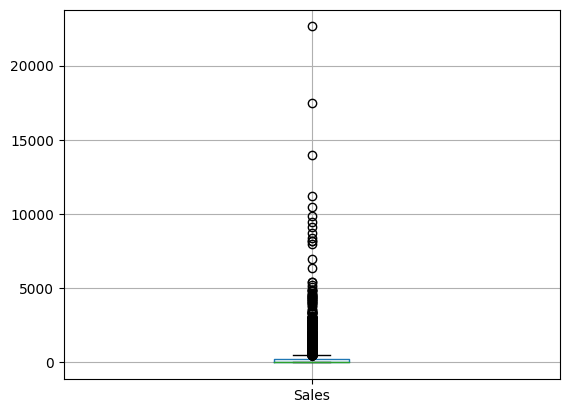

In [20]:
boxplot = df.boxplot(column='Sales')

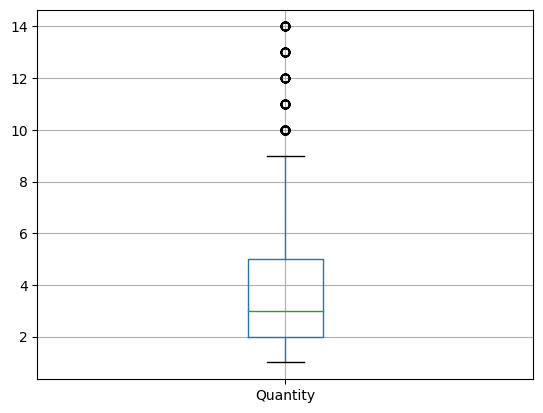

In [21]:
boxplot = df.boxplot(column='Quantity')

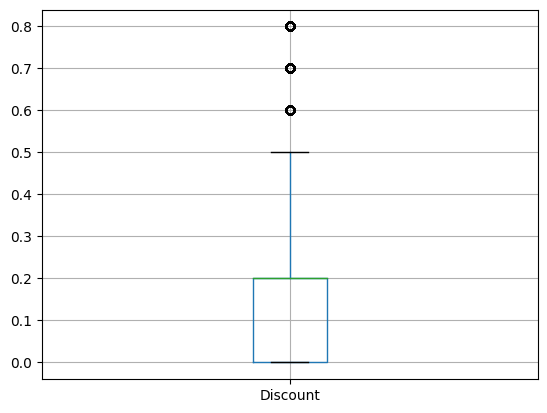

In [22]:
boxplot = df.boxplot(column='Discount')

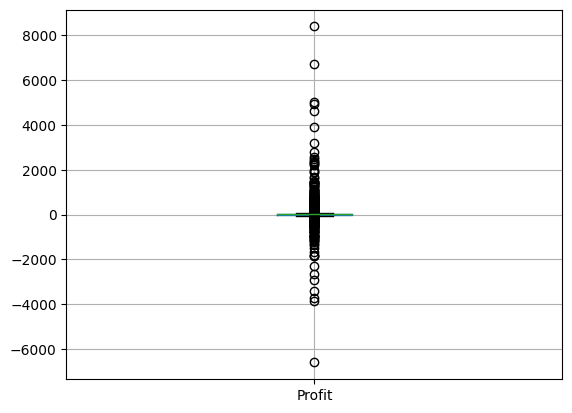

In [23]:
boxplot = df.boxplot(column='Profit')